# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 14 (Friday) 11:00 pm </b> </font>

<font color="blue"> Pa Pa Oo </font>

# Introduction

# Goal 

The goal of this assignment is to practice our first machine learning models, least squares (LS) and least means squares (LMS), by applying them to real data. We will prepare data as we did in last week's practice and then apply these linear models. 


Linear models describe a continuous response variable as a function of one or more predictor variables. They can help you understand and predict the behavior of complex data.Linear regression is a statistical method used to create a linear model. The model describes the relationship between a dependent variable as a function of one or more independent variables X. 
The general equation for a linear model is a linear equation that combines a specific set of input values (x) the solution to which is the predicted output for that set of input values (y).

Linear model can be defined as a Euclidean dot product between two vectors: 

$$
\begin{align}
  f(\xv; \wv) &= \wv^\top \xv = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

where 'w' is the weight vector and 'x' is the input vector.

In this assignment, we will use least squares (LS) and least mean square (LMS) for finding the best fit. Least Squares is the most common method used in linear regression. 


	Download the targeted dataset from UCI Data Repository 
	Read the information from the UCI library. 
	Check the entire DataFrame to see if there are any missing values 
	Drop col 0 (instant) because that is just the ID
	Drop col 1(dteday) because it just tells the day the record was made, but does not provide anything else
   Perform plots for understanding or analysis and find if there are any correlations between the variables and features
   Create a base model ABC and required abstract classes 
   Create linearmodel class
   Create linear regression classes
   Validation of model:
     - create plots to check model
     - useful wheether it passes the preliminary test by verification the least mean square and least squares with various data                

# Data

## description

Bike Sharing Dataset
        This data set is about bike sharing in the city. A user can rent a bike from a particular location and return back at another location. 

- Range: between a network of stations throughout the city
- Type of users: registered and casual riders

        Registered users are most likely commuters who use the bicycle as mean of transportation on a regular basis. Casual users are a more varied group, probably a mix of tourists, locals using the bikes for leisure purposes, maybe some commuters in need of a temporary alternative, etc. 

        In this assignmnet, we can make a prediction for the following: 

-	Demand for bikes is not equally distributed in some location and at a particular time
-	Find out what criteria trigger the demand
-	Correlation between events and other conditions (eg: weather, day of the week, etc)
-	How to improve the distribution of bikes equally

Attributes Information
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether a day is a holiday (1) or not (0).
- weekday : day of the week, 0 = Sunday, 1 = Monday, etc.
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16,  t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)            
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

        The columns “instant“and “dteday” were removed from the datasets, as they did not represent any features. I decided to keep column yr, even though its values correspond only to years 2011and 2012, because cultural change, events happening in the world, etc that might have played into the behavior of ridership.


## preprocessing the data

### reading the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
ddf = pd.read_csv("hour.csv")
#  Reading the data
ddf.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
df = ddf.drop(columns=['dteday','instant','casual', 'registered'])
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [3]:
ddf.shape

(17379, 17)

In [4]:
# TODO: Check the entire DataFrame to see if there are any missing values
np.any(ddf.isnull())

False

In [5]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [6]:
# TODO: Check for missing values (i.e. None/null values) like what we did with Numpy in the previous section
df.isnull()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# TODO: Assign the three X, T, and N variables with proper values.
X = df.iloc[:, :-1]
T = df.iloc[:, -1] 
N = df.shape[0]


## plots for understanding or analysis

        Plotting is important in machine learning because it is very useful and helpful under several conditions, for instance, when visualized information is easier and more effective than descriptive statistics. Furthermore, it also helps to see the correlations between sets of data and recognition of patterns, resulting the users to understand data in an effective and efficient manner.
        The following graphs allows us to understand the correlation between variables such as total count vs temperature. Data visualization indicates which features are the effect the number of total riders and how it is related with them.  It is extremely difficult to determine the relationship between two variables without a visualization.     

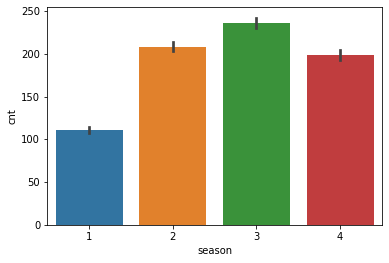

In [8]:
# sb.barplot(x="season", y="cnt", data= df, order=["Winter", "Spring", "Summer", "Fall"])

sb.barplot(data= df, x="season", y="cnt")

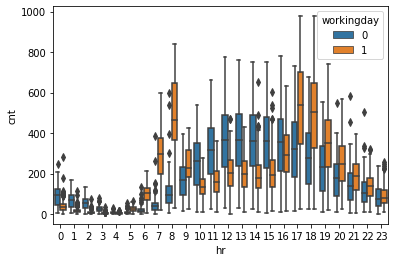

In [9]:
sns.boxplot(x="hr", y="cnt", hue = 'workingday', data = df)
plt.show()

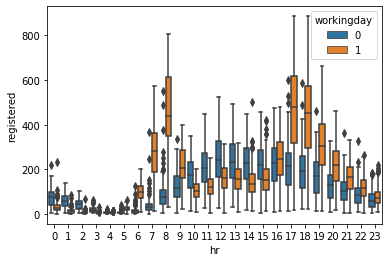

In [10]:
sns.boxplot(x="hr", y="registered", hue = 'workingday', data = ddf)
plt.show()

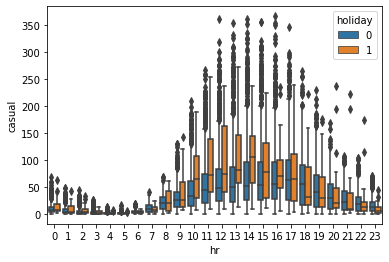

In [11]:
sns.boxplot(x="hr", y="casual", hue = 'holiday', data = ddf)
plt.show()

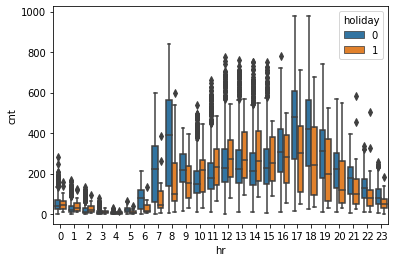

In [12]:
sns.boxplot(x="hr", y="cnt", hue = 'holiday', data = df)
plt.show()

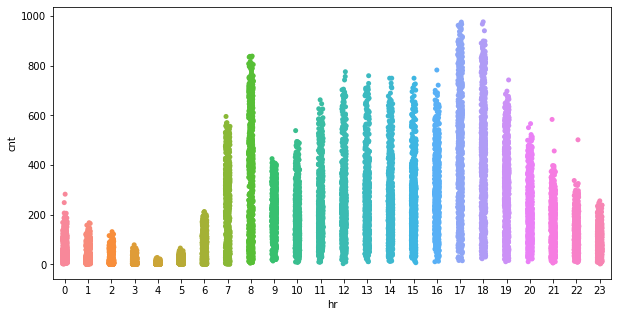

In [13]:
plt.rcParams["figure.figsize"] =(10,5)
sns.stripplot(x="hr", y="cnt", data=df)
plt.show()

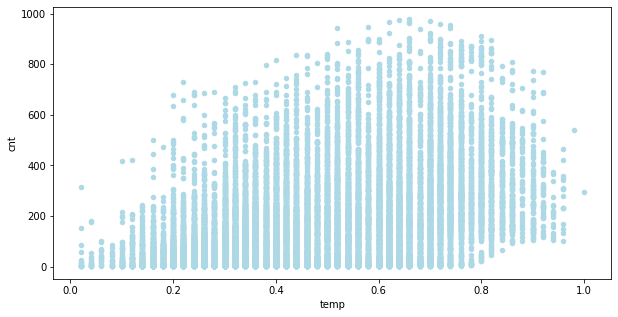

In [14]:
ax1 = df.plot.scatter(x='temp',y='cnt',c='LightBlue')

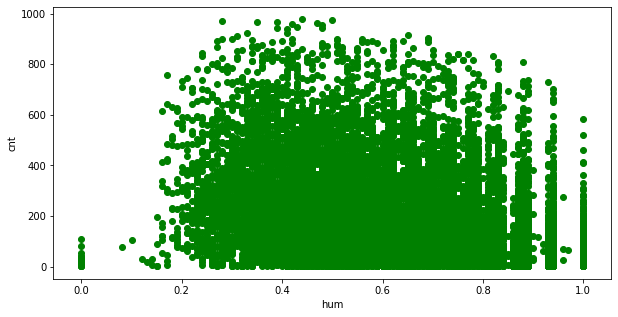

In [15]:
plt.scatter(df.iloc[:,10:11],df.iloc[:,12:13], color = 'green')
plt.xlabel("hum")
plt.ylabel("cnt")
plt.show()

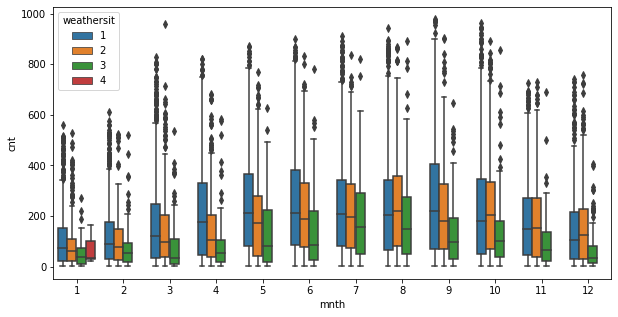

In [16]:
sns.boxplot(x="mnth", y="cnt", hue = 'weathersit', data = df)
plt.show()

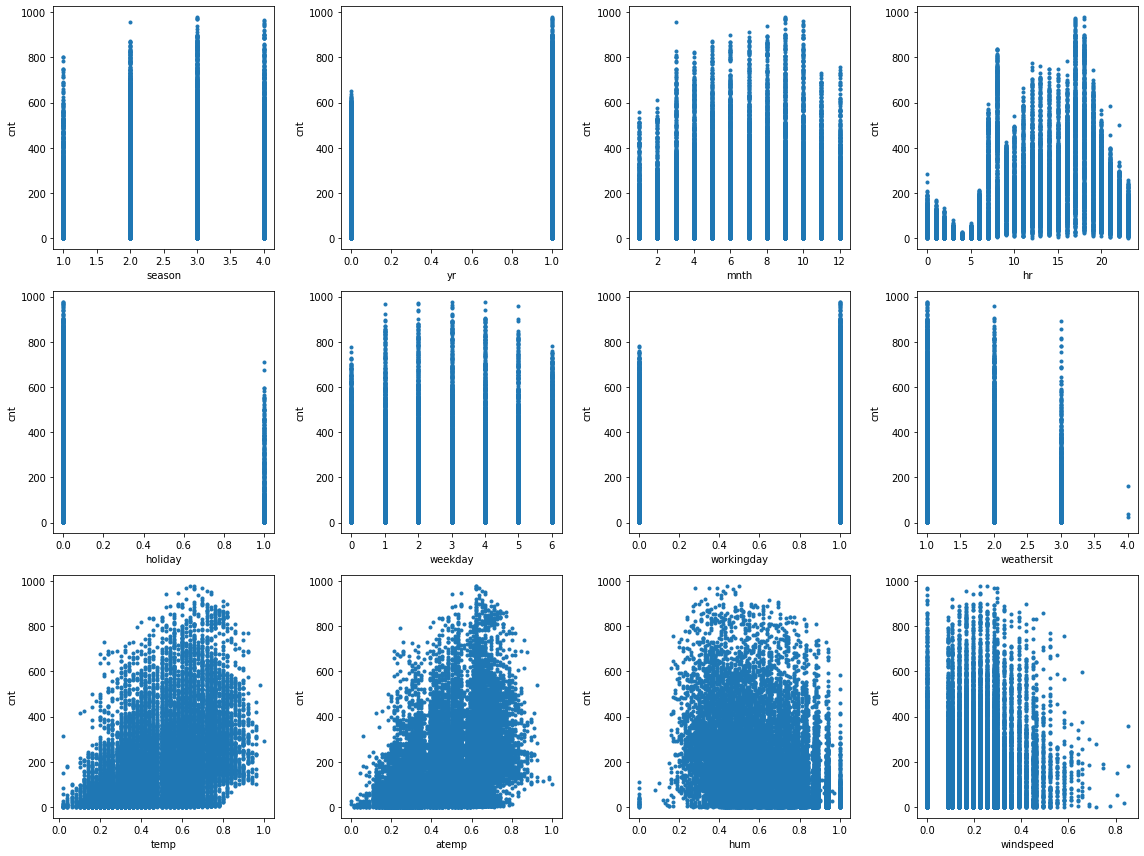

In [17]:
#Plot a line graph using the 'cnt' values from the previous step by using plt.plot()

yC = df['cnt'].values.reshape(-1,1)
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(df.iloc[:, i], yC, '.')
    plt.xlabel(df.columns.values[i])
    plt.ylabel('cnt')
fig.tight_layout()

## preliminary observation

From the above visualization we can infer:
- It is obvious that people tend to rent a bike during summer season since it is really conducive to ride bike in that season. This is the probably the reason why June, July, and August have relatively higher demand for the bicycle.

- More people are likely to rent bicycles between 7 am – 8 am and 5 pm - 6 pm during the work week. This is because of regular school and office commuters.

- On Saturdays and Sundays where more people tend to rent bicycle around 10am – 4 pm.

- The peak riders count around between 7 am – 8 am and 5 pm - 6 pm is purely contributed by the registered users while the peak riders count on weekends is more likely attributed by casual riders who are a mix of tourists, locals using the bikes for leisure purposes, or a temporary alternative commutation. 

- From the above plot, the “cnt” variable and “weathersit” indicated that riders are more likely to rent bikes when the weather in good condition, for instance, Clear, Few clouds, Partly cloudy. In other words, the usage is decreased when the weather is poor.

     Now we have visualized the data and hour of the day is one of the features triggering the number of total riders. To further understanding, we will build some models and see how we can forecast bike rental demand.


## preprocessing of the data

In [18]:
# TODO: Assign the three X, T, and N variables with proper values.
X = df.iloc[:, :-1]
T = df.iloc[:, -1] 
N = df.shape[0]


In [19]:
X = X.values
T = T.values

In [20]:
# TODO: Take the log of zs storing it in a new variable log_zs
Tlog = np.log(T + 1)


# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


## review - review of the linear models 

## explanation of codes - your implementation and description

Two algorithms are implemented which are Least Squares (LS) and Least Mean Squares (LMS). Under a base class which is so called “BaseModel”, there is two abstract method which are 'train' and 'use'.  Linear Regression Class for least squares is “LinearRegress” by using linear square method. After initialize the “init”, two classes train(self,X,T) and use(self,X) are being defined. 

Least Squares
    
train(self,X,T):
    The function accepts two parameters: 2-dimentional matrix and vector. Basically, we calculate the weights with our predictor matrix will give best prediction line and training the weight w for the whole training dataset. Add the bias term, a vector of 1s, to the first column of X input matrix and then calculating the weight by using “np.linalg.pinv”. 
    
use(self,X):
    This method return the new predictions (vectors) by calculating the with the dot product of  “w” in train method and matrix.

Least Mean Squares

train(self,X,T): 
    It initialized the weight vector for the whole training dataset. Then, we initialized train_step(self,x,t) function for every “x” and “t”. It recursively calls the train_step(self, x, t) function until all the values of X and T are running out. 

train_step (self,X,T):
    This function will first check if the x has 2 dimensional matrix or not. If it is not 2 dimensional, it will insert the values. Now it will check if the self.w is empty or not. If it is empty then it will add zeroes to self.w array. If it is not empty, then it will check for the alpha value for the line.

use(self,X): This method return the new predictions (vectors) by calculating with the dot product of  “w” (weight vector) in train method and matrix.


### Super Classs Definition

In [21]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [22]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)         #initialization 
        
    # train lease-squares model
    def train(self, X, T):
        ## TODO: replace this with your codes
        #calculating weight 
        
#         bias = np.ones((N,1))
#         X1 = np.hstack([bias, X]) 
        X = self.add_ones(X)
        X1_inverse = np.linalg.pinv(X.T @ X)
        self.w = X1_inverse @ X.T @ T            
        return self.w
    
    # apply the learned model to data X (test method)
    def use(self, X):  
        ## TODO: replace this with your codes
        X = self.add_ones(X)
        Y = X @ self.w
        return Y


### Least Mean Squares

In [23]:
import collections # for checking iterable instance
from sklearn.model_selection import train_test_split
# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        ## TODO: replace this with your codes  
            ## for loop
            ## call the function: train_step  
        
#         for k in range(X.shape[0]):
#             self.train_step(x,t)

        for x, t in zip(X, T):
            self.train_step(x, t)        
            
 
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
    ## TODO: replace this with your codes  train step       
    ## update the weight          
    
        x = x.reshape(1,x.size)
        t = t.reshape(t.size,1)
        x1 = self.add_ones(x)
        if self.w is None:
            self.w = np.zeros((x1.shape[1],1))
#           self.w = np.zeros(x1.shape[1]).reshape((1,-1))
      
        self.w -= self.alpha*(x1 @ self.w - t)* x1.T
     
    # apply the current model to data X (test method)
    def use(self, X): 
        ## TODO: replace this with your codes
        
        X1 = self.add_ones(X)
        y = X1 @ self.w.reshape(-1,1)
        return y

### Preliminary Test

In this following tests, we examine if the implementation is correct with a simple test data, $f(x) = -2 x + 3.2$ where $x \in \{0, 1, 2, \dots, 9, 10 \}$. 

In [24]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

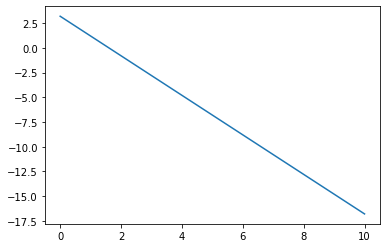

In [25]:
# least square model
ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

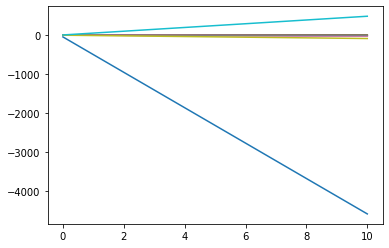

In [26]:
# least mean square model
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

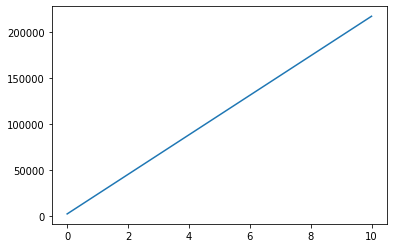

In [27]:
lms.train(X, T)
plt.plot(lms.use(X))

In [28]:
lms.train(X, T)

## Correct implementation (preliminary test) 
After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [29]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

## description, codes

Define X, yC and consider yC as an array. Then, transpose the array. By using the trainingset and test for training the LMS model and evaluate the performance.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Least Squares 

In [31]:
#Seperate Target Column and Feature Set
X = df.values
#target comn
yC = ddf['cnt'].values
yC = np.array([yC])
yC = yC.transpose()
# transposed yC



In [32]:
# linear regression on selected features 
X_train, X_test, y_train, y_test = train_test_split(X, yC, test_size=0.3, random_state=15)
# Instantiate model
ls = LinearRegress()
ls.train(X_train, y_train)
y_ls = ls.use(X_test)

In [33]:
# Computes RMSE
RMSE = np.sqrt(np.mean((y_test- y_ls)**2))
print('RMSE value is:', RMSE)

RMSE value is: 2.6035530814843753e-11


In [34]:

print("Shapes of X_train{},   y_train{},   y_test{},   T_test{}".format(X_train.shape, y_train.shape, X_test.shape, X_test.shape))

Shapes of X_train(12165, 13),   y_train(12165, 1),   y_test(5214, 13),   T_test(5214, 13)


## Least Mean Squares

In [35]:
# least mean square model
lms = LMS(.0000000019999)
lms.train(X_train, y_train)
y_lms = lms.use(X_test)

# Computes RMSE
RMSE = np.sqrt(np.mean((y_test- y_lms)**2))
print('RMSE value is:', RMSE)


RMSE value is: 48.49508812413086


## visualization of results


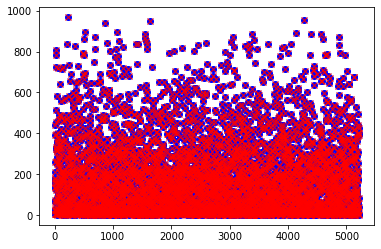

In [36]:
# Plot the LS predictions using the code below.
plt.plot(y_test, 'ob')
plt.plot(y_ls, 'xr')

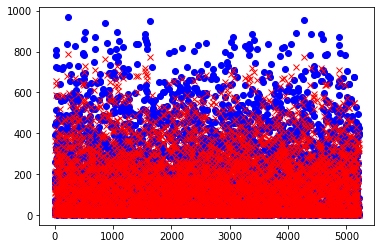

In [37]:
# Plot the LMS predictions using the code below.
plt.plot(y_test, 'ob')
plt.plot(y_lms, 'xr')

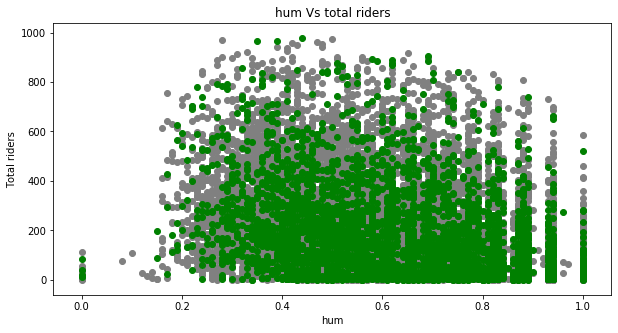

In [38]:
# linear regression on humidity

ls=LinearRegress()
ls.train(X_train,y_train)
y_pred=ls.use(X_test)

X = df
X_train, X_test, y_train, y_test = train_test_split(X, yC, test_size=0.2, random_state=1)

#plot and compare expected versus actual results
plt.figure(figsize=(10,5))
plt.title('hum Vs total riders', fontsize=12)
plt.xlabel('hum')
plt.ylabel('Total riders')
plt.scatter(X_train['hum'], y_train,  color='gray')
plt.scatter(X_test['hum'], y_test, color='green')


 The humidity level tend to affect bicycle rentals, but casual riders are more heavily by adverse conditions.

From the above-plot it shows, there are more rental in morning(from 7- 9 am) and evening(16-19 pm). People rent bikes more in Fall, and much less in Spring and higher in summer.

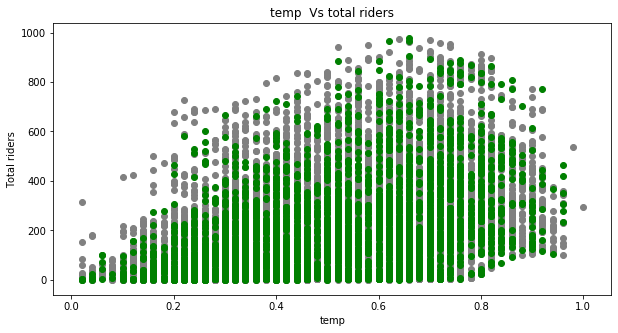

In [39]:
# linear regression on temperature features 
ls=LinearRegress()
ls.train(X_train,y_train)
y_pred=ls.use(X_test)

X = df
X_train, X_test, y_train, y_test = train_test_split(X, yC, test_size=0.2, random_state=1)
plt.figure(figsize=(10,5))
plt.title('temp  Vs total riders', fontsize=12)
plt.xlabel('temp')
plt.ylabel('Total riders')
plt.scatter(X_train['temp'], y_train,  color='gray')
plt.scatter(X_test['temp'], y_test, color='green')

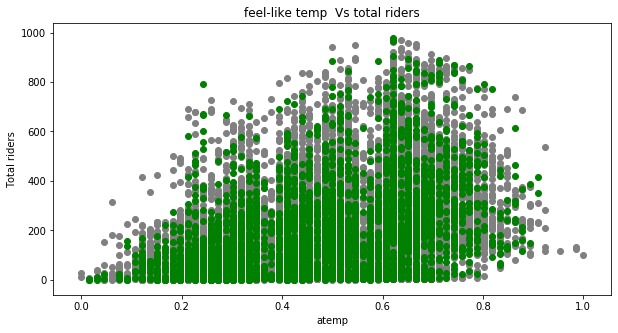

In [40]:
# linear regression on feel-like temperature
ls=LinearRegress()
ls.train(X_train,y_train)
y_pred=ls.use(X_test)

X = df
X_train, X_test, y_train, y_test = train_test_split(X, yC, test_size=0.2, random_state=1)
plt.figure(figsize=(10,5))
plt.title('feel-like temp  Vs total riders', fontsize=12)
plt.xlabel('atemp')
plt.ylabel('Total riders')
plt.scatter(X_train['atemp'], y_train,  color='gray')
plt.scatter(X_test['atemp'], y_test, color='green')

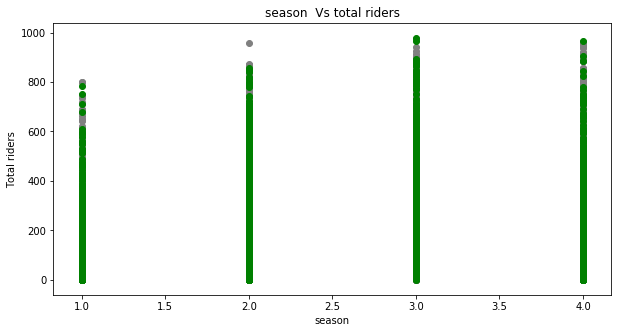

In [41]:
# linear regression on season feature
ls=LinearRegress()
ls.train(X_train,y_train)
y_pred=ls.use(X_test)

X = df
X_train, X_test, y_train, y_test = train_test_split(X, yC, test_size=0.2, random_state=1)
plt.figure(figsize=(10,5))
plt.title('season  Vs total riders', fontsize=12)
plt.xlabel('season')
plt.ylabel('Total riders')
plt.scatter(X_train['season'], y_train,  color='gray')
plt.scatter(X_test['season'], y_test, color='green')

From the above-plot it shows, there are more people rent bikes more in Fall, and much less in Spring and higher in summer.

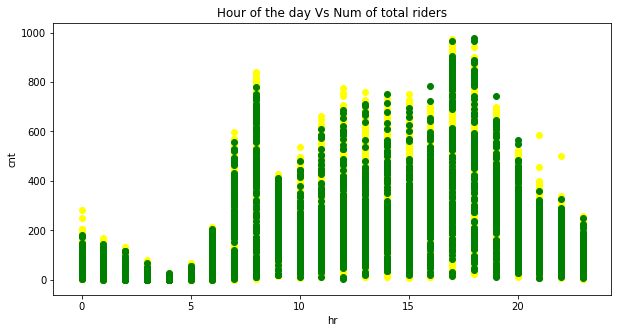

In [42]:
# linear regression on hour of the day  feature
ls=LinearRegress()
ls.train(X_train,y_train)
y_pred=ls.use(X_test)

X = df
X_train, X_test, y_train, y_test = train_test_split(X, yC, test_size=0.2, random_state=1)
plt.figure(figsize=(10,5))
plt.title('Hour of the day Vs Num of total riders', fontsize=12)
plt.xlabel('hr')
plt.ylabel('cnt')
plt.scatter(X_train['hr'], y_train,  color='yellow')
plt.scatter(X_test['hr'], y_test, color='green')

Text(0.5, 1.0, 'Linear Regression Model')

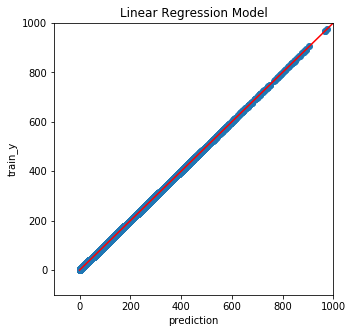

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
# plt.scatter(y_test,y_pred)
plt.scatter(y_pred, y_test)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('prediction')
plt.ylabel('train_y')
plt.title('Linear Regression Model')

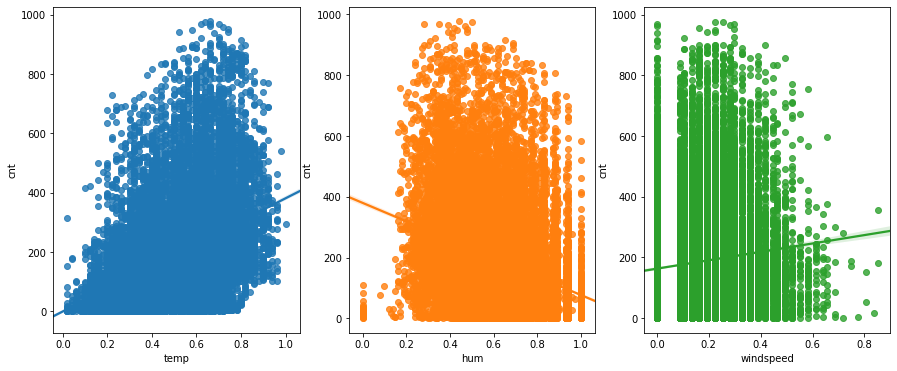

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,6))
sns.regplot(x='temp', y='cnt', data=df, ax=ax1)
sns.regplot(x='hum', y='cnt', data=df, ax=ax2)
sns.regplot(x='windspeed', y='cnt', data=df, ax=ax3)

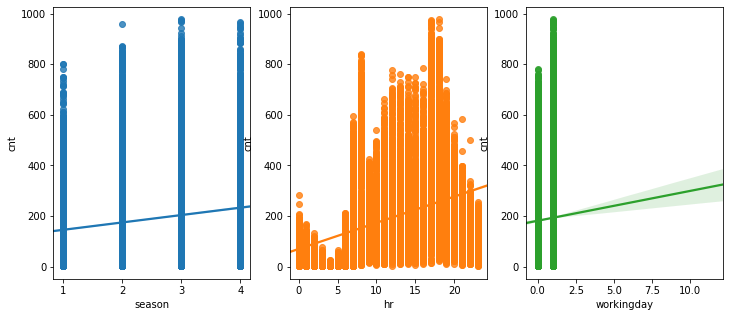

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))
sns.regplot(x='season', y='cnt', data=df, ax=ax1)
sns.regplot(x='hr', y='cnt', data=df, ax=ax2)
sns.regplot(x='workingday', y='cnt', data=df, ax=ax3)

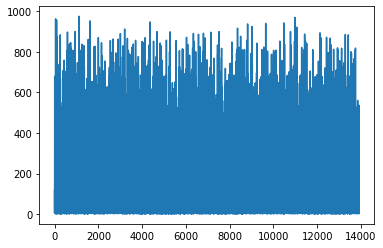

In [46]:
plt.plot(ls.use(X_train))

## analysis / comparison of algorithms

    As seen from the scatter plots above, there is a positive correlation between both temperature-to-usage and adjusted-temperature-to-usage for most of the temperature range, and a linear fit isn’t far from the best-fit curve. This should make sense, as people are likely to bike outside in good weather like summer or when the temperature is between 60 -70 and unlikely to ride in cold weather. From the graph, we can understand that bikers discouraged to bike when it is too hot outside.
    
    There seems to be a negative correlation between the humidity and the number of riders. This could be explained by the climate of city. Higher humidity is related with higher chances of rainfall.
    
    By looking at the effects of time on the number of riders, people tend to bike in late night and the peaks are during 8–9 am and 5–7 pm. Overall, the fit is far from linear. However, if we change the temporal distance to 4 am, the linear is fit. 

Least Squares

Advantages:
- Simplicity: It is very easy to explain and to understand
- Applicability: hardly any applications where least squares does not make sense

Disadvantages:
- Sensitivity to outliers
- Not suitable for large datasets
- Test statistics might be unreliable when the data is not normally distributed 

Least Mean Squares

Advantages:
- It is faster to compute. 
- Test statistics is reliable when the data is normally distributed 

Disadvantages:
- Not suitable for small datasets


# Conclusions, References

    I have spent so much time on working on “train_step” function. If I could change one thing, I probably would have followed my calendar exactly in order to stay organized and complete the assigned task on daily basic. So, I would not struggle to complete the tasks or staying up all night to complete them. If you have any suggestion about the assignment, you can write about it.

# References

        Daphine, A. (2018, November 24). Least squares regression method - definition, explanation, example and limitations. Retrieved from https://www.accountingformanagement.org/least-squares-regression-method/
        
Stephanie. (2019, September 9). Least Squares Regression Line: Ordinary and Partial. Retrieved from https://www.statisticshowto.datasciencecentral.com/least-squares-regression-line/

What is the Least Mean Square Algorithm (LMS Algorithm)? - Definition from Techopedia. (n.d.). Retrieved from https://www.techopedia.com/definition/33276/least-mean-square-algorithm-lms-algorithm

Nibras, N. (2019, March 31). Predicting Bike-share users with Machine Learning. Retrieved from https://towardsdatascience.com/predicting-no-of-bike-share-users-machine-learning-data-visualization-project-using-r-71bc1b9a7495

Bike Sharing Demand. (n.d.). Retrieved from https://www.kaggle.com/c/bike-sharing-demand

Srinivasan, V. (2019, October 7). How to finish in the top 10 percentile in Bike Sharing Demand Competition In Kaggle? (part -2). Retrieved from https://medium.com/analytics-vidhya/how-to-finish-top-10-percentile-in-bike-sharing-demand-competition-in-kaggle-part-2-29e854aaab7d
